In [2]:
import collections.abc
import pickle
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from openretina.dataloaders import dataloaders_from_dictionaries
from openretina.hoefling_2022_configs import model_config, trainer_config
from openretina.misc import CustomPrettyPrinter
from openretina.plotting import play_stimulus
from openretina.training import standard_early_stop_trainer as trainer

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pp = CustomPrettyPrinter(indent=4)


collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
from nnfabrik_euler.models.models import SFB3d_core_SxF3d_readout

In [3]:
!ls /Data/fd_export

dataloaders_c2853298342c04f19202e352d7ecc97e.pkl
dataloaders_stim_8c18928_responses_99c71a0.pkl
dataloaders_stim_c285329_responses_0698360.pkl
dataloaders_stim_c285329_responses_483c12d.pkl
movies_8c18928.pkl
movies_c285329.pkl
movies_c2853298342c04f19202e352d7ecc97e.pkl


In [4]:
stim_dataloaders_dict = pickle.load(open("/Data/fd_export/dataloaders_stim_8c18928_responses_99c71a0.pkl", "rb"))
movies_dict = pickle.load(open("/Data/fd_export/movies_8c18928.pkl", "rb"))

In [5]:
dataloaders = dataloaders_from_dictionaries(stim_dataloaders_dict, movies_dict)
model = SFB3d_core_SxF3d_readout(**model_config, dataloaders=dataloaders, seed=0)

{'1_ventral1_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 86])}, '2_ventral1_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 65])}, '1_ventral2_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 90])}, '2_ventral2_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 95])}, '3_ventral2_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 115])}, '4_ventral2_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 77])}, '5_ventral2_20210929': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 83])}, '1_ventral1_20210930': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 69])}, '1_ventral2_20210930': {'inputs': torch.Size([32, 2, 50, 18, 16]), 'targets': torch.Size([32, 50, 103])}, '2_ventral2_20210930': {'inputs': torch.Size([32, 2,

/Projects/controversial-stimuli-retina/nnfabrik_euler/nnfabrik_euler/models/batch_correction_cores.py:417: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  mask = mask_tf(time.T, stretches, T)
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [15]:
pp.pprint(dataloaders)

{   'test': {   '1_ventral1_20210929': torch.utils.data.DataLoader(Dataset: MovieDataSet with 86 neuron responses to a movie of shape [2, 750, 18, 16].),
                '1_ventral1_20210930': torch.utils.data.DataLoader(Dataset: MovieDataSet with 69 neuron responses to a movie of shape [2, 750, 18, 16].),
                '1_ventral2_20210929': torch.utils.data.DataLoader(Dataset: MovieDataSet with 90 neuron responses to a movie of shape [2, 750, 18, 16].),
                '1_ventral2_20210930': torch.utils.data.DataLoader(Dataset: MovieDataSet with 103 neuron responses to a movie of shape [2, 750, 18, 16].),
                '2_ventral1_20210929': torch.utils.data.DataLoader(Dataset: MovieDataSet with 65 neuron responses to a movie of shape [2, 750, 18, 16].),
                '2_ventral2_20210929': torch.utils.data.DataLoader(Dataset: MovieDataSet with 95 neuron responses to a movie of shape [2, 750, 18, 16].),
                '2_ventral2_20210930': torch.utils.data.DataLoader(Dataset:

In [16]:
# Seed 0 is expected to train for 60 epochs

test_score, val_score, output, model_state = trainer(model=model, dataloaders=dataloaders, seed=0, **trainer_config)

Random seed 0 has been set.


Epoch 1:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 11:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 12:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 13:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 14:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 15:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 16:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 17:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 18:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 19:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 20:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 21:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 22:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 23:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 24:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 25:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 26:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 27:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 28:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 29:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 30:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 31:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 32:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 33:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 34:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 35:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 36:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 37:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 38:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 39:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 40:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 41:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 42:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 43:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 44:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 45:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 46:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 47:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 48:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 49:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 50:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 51:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 52:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 53:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 54:   0%|          | 0/99 [00:00<?, ?it/s]

In [17]:
test_score

-0.028795693037856337

In [18]:
val_score

0.11322278599453788

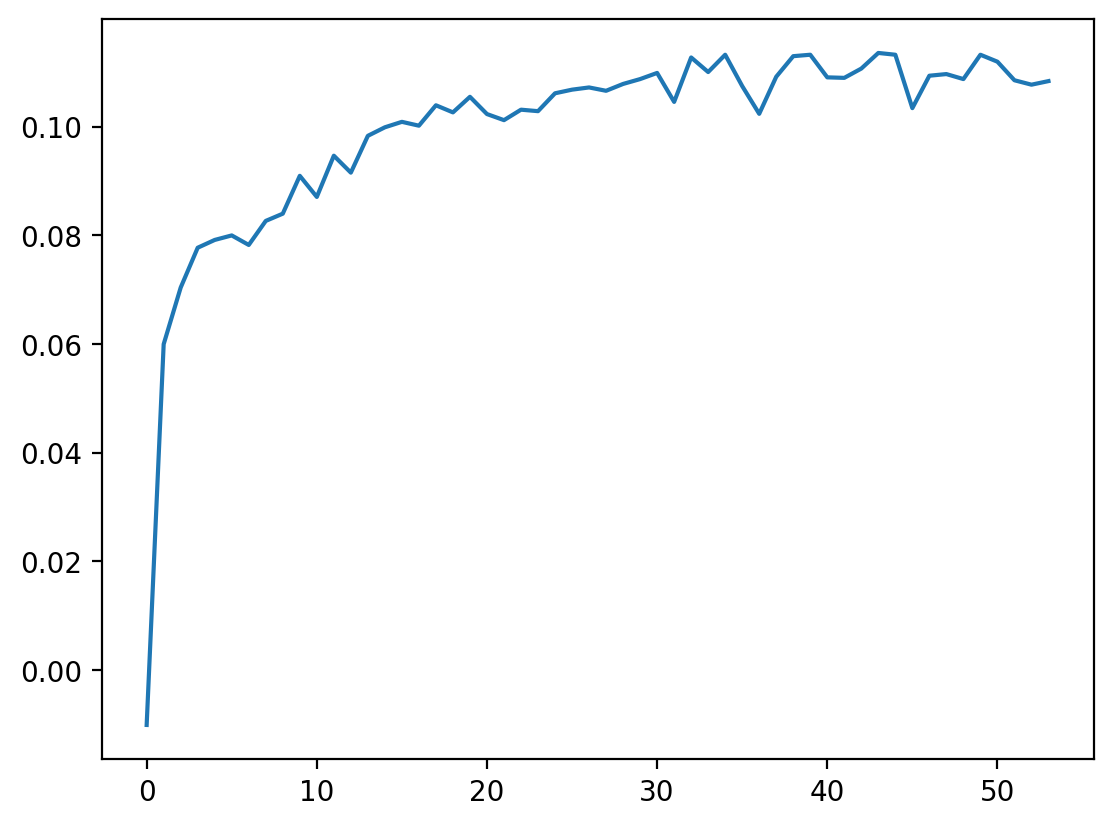

In [19]:
plt.plot(output["val_correlation"])

In [20]:
test_field = "1_ventral1_20210929"
test_sample = next(iter(dataloaders["test"][test_field]))

In [21]:
input_samples = test_sample.inputs
targets = test_sample.targets

In [22]:
with torch.no_grad():
    reconstructions = model(input_samples.to("cuda:0"), test_field)

In [23]:
reconstructions = reconstructions.cpu().numpy().squeeze()
targets = targets.cpu().numpy().squeeze()

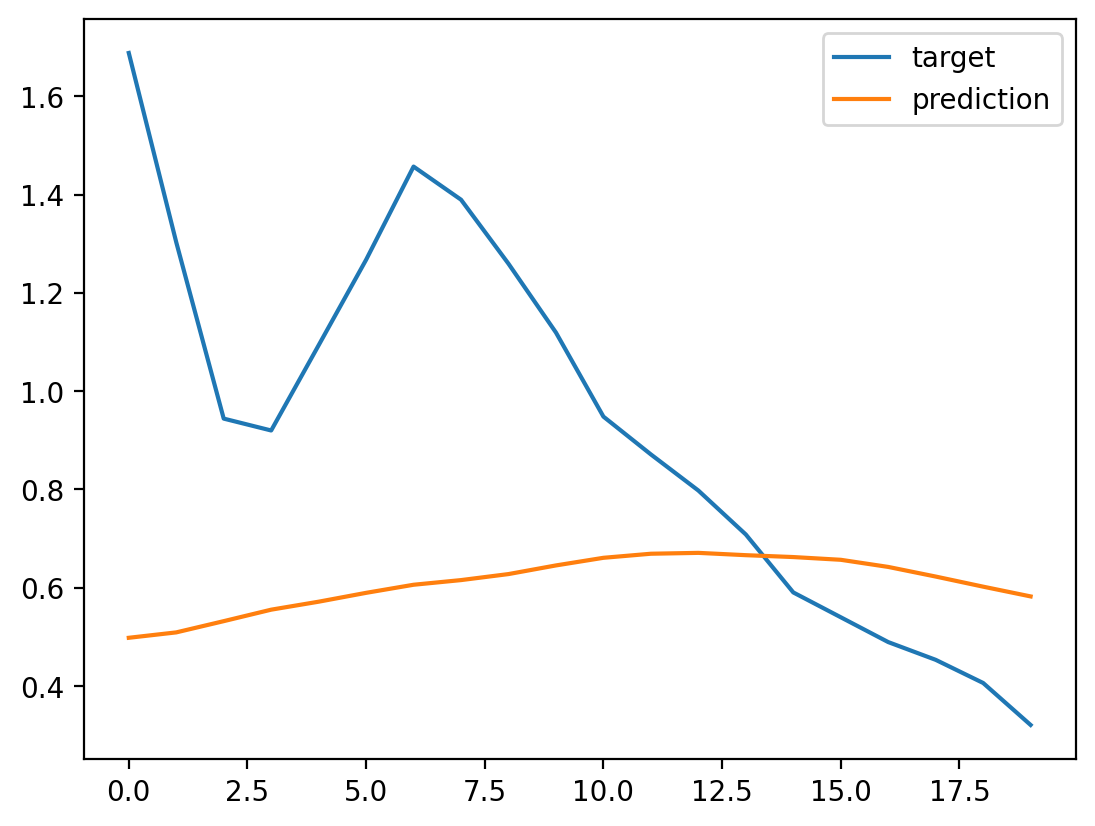

In [25]:
index = 1
plt.plot(targets[30:, index], label="target")
plt.plot(reconstructions[:, index], label="prediction")
plt.legend()